Jeremy pointed out that the low purity and completeness for the Santa Cruz SAM may be indicative of some issue with the satellite fraction at low halo masses.

In [1]:
import numpy as np

from letstalkaboutquench import util as UT
from letstalkaboutquench import catalogs as Cats

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
names = ['illustris_100myr', 'eagle_100myr', 'mufasa_100myr', 'scsam_100myr']

In [4]:
m_mids, f_sats = [], []

cats = Cats.Catalog()
for i_n, name in enumerate(names): 
    logM, _, _, censat = cats.Read(name, keepzeros=True, silent=True)
    
    mbins = np.linspace(8., 12., 17)
    m_mid, f_sat = [], []
    for im in range(len(mbins)-1): 
        inmbin = ((logM > mbins[im]) & (logM < mbins[im+1]))
        
        if np.sum(inmbin) == 0: 
            continue
        m_mid.append(0.5*(mbins[im] + mbins[im+1]))
        
        N_sat = (censat[inmbin] == 0)
        f_sat.append(float(np.sum(N_sat))/float(np.sum(inmbin)))
    m_mids.append(m_mid)
    f_sats.append(f_sat)

/Users/chang/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:75: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_ssfr) + logM # calculate log SFR from sSFR
/Users/chang/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:94: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR) # log SFRs
/Users/chang/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:166: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR)


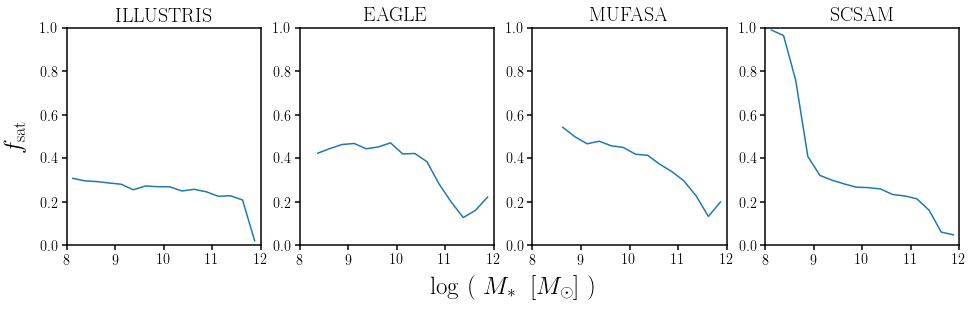

In [9]:
fig = plt.figure(figsize=(16,4))
bkgd = fig.add_subplot(111, frameon=False)
for i_n, name in enumerate(names): 
    sub = fig.add_subplot(1,4,i_n+1)
    sub.plot(m_mids[i_n], f_sats[i_n])
    sub.set_xlim([8., 12.])
    sub.set_ylim([0., 1.])
    sub.set_title(name.split('_')[0].upper(), fontsize=20)
bkgd.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', labelpad=10, fontsize=25)
bkgd.set_ylabel(r'$f_\mathrm{sat}$', labelpad=10, fontsize=25)
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)